In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r"C:\Users\1\Desktop\Internahala course (Data Science\Study Material\Module 1\Project\train.csv")
test=pd.read_csv(r"C:\Users\1\Desktop\Internahala course (Data Science\Study Material\Module 1\Project\test.csv")

In [3]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [4]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [6]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [7]:
#train.isnull().sum()
#test.isnull().sum()

In [8]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [13]:
train.subscribed.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

# Analysis of target variable

In [10]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

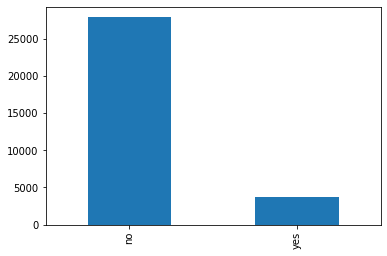

In [11]:
train['subscribed'].value_counts().plot.bar()
# max no of customer have not subcribed trem deposit scheme

In [12]:
train.subscribed.replace({"yes":1,"no":0},inplace=True)

# Analysis of categorical varables

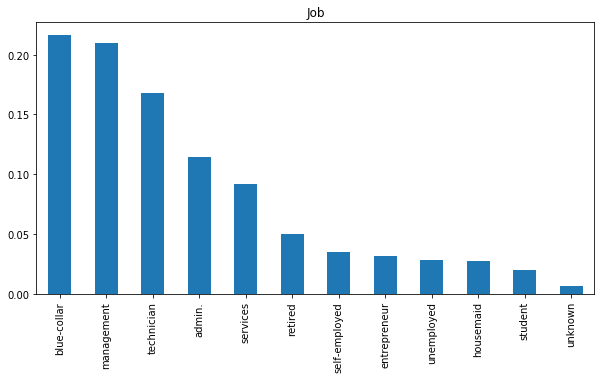

In [14]:
# visualization of categorical variables
train['job'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Job')
#In job max no of customer belongs to categories blue-collar,management,technical,services than other categories.
#Student are not doing term deposit in general.

In [15]:
#train['marital'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Marital')
# most of the applicants are belongs to married category
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

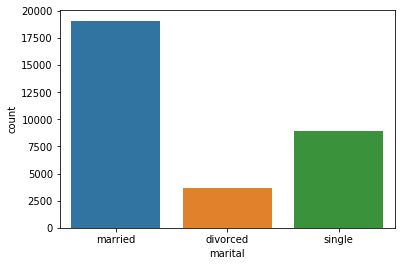

In [16]:
sns.countplot(data=train, x='marital');

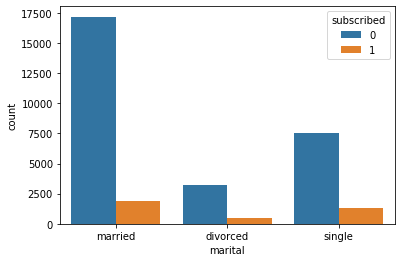

In [17]:
sns.countplot(data=train, x='marital', hue='subscribed');

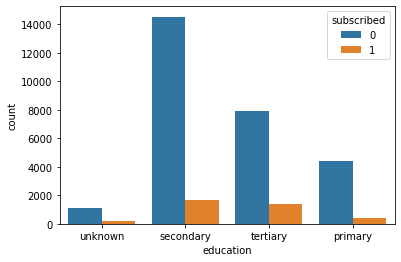

In [19]:
#train['education'].value_counts(normalize=True).plot.bar(title='Education')
# maximum no of customer having secondary  education subcribed term deposite
sns.countplot(data=train, x='education',hue='subscribed')

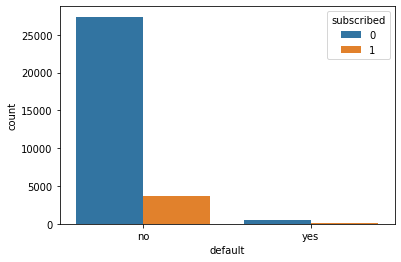

In [20]:
#train['default'].value_counts(normalize=True).plot.bar(title='Default')
#customer with not having default credit do term deposit
sns.countplot(data=train,x='default',hue='subscribed')

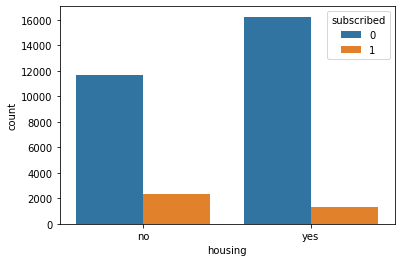

In [22]:
#train['housing'].value_counts(normalize=True).plot.bar(title='Housing')
# The customer not having housing loan max. chances to do term deposit
sns.countplot(data=train, x='housing',hue='subscribed')

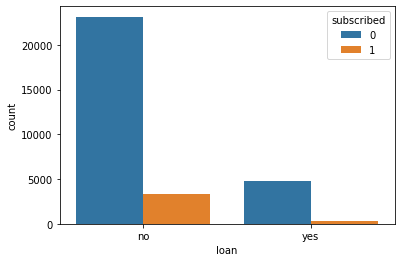

In [23]:
#train['loan'].value_counts(normalize=True).plot.bar(title='Loan')
# The people not  having personal loan do term deposit
sns.countplot(data=train,x='loan',hue='subscribed')

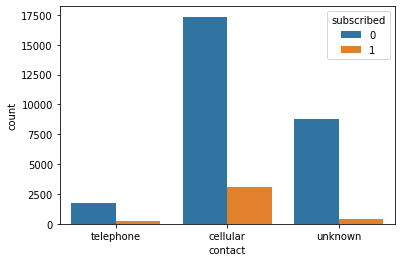

In [24]:
#train['contact'].value_counts(normalize=True).plot.bar(title='Contact')
# most  of the people contacted by cell do term deposite
sns.countplot(data=train,x='contact',hue='subscribed')

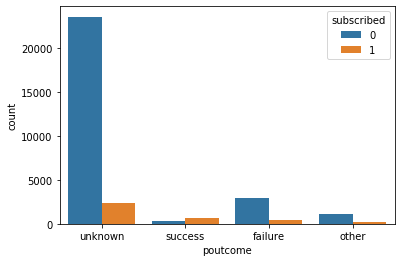

In [25]:
train['poutcome'].value_counts()
sns.countplot(data=train,x='poutcome',hue='subscribed')

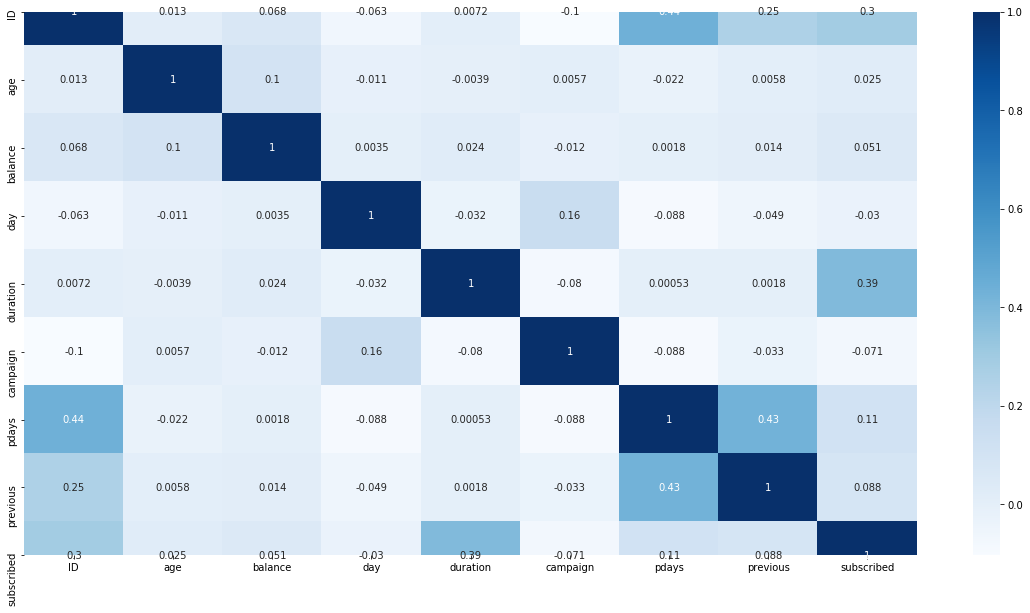

In [26]:
#Feature call duration is highly correlated with target 
plt.figure(figsize=(20,10))
Cor=train.corr()
sns.heatmap(Cor,annot=True,cmap=plt.cm.Blues)
plt.show()
# call duration feature is highly corelted with target variable

# analysing age variable

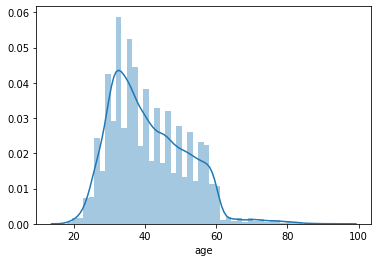

In [27]:
sns.distplot(train['age'])
#most of the customer are from age group 20 to 60

# Bivariate Analysis

In [28]:
#job vs subscribed
print(pd.crosstab(train['job'],train['subscribed']))

subscribed        0    1
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


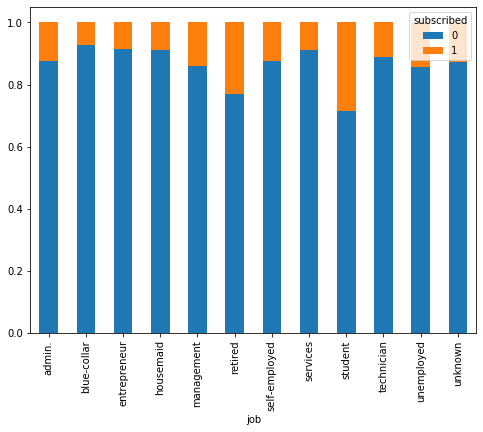

In [29]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm.plot.bar(stacked=True,figsize=(8,6));
#from graph  no of student and retired persons are doing term deposit is max which is surprising

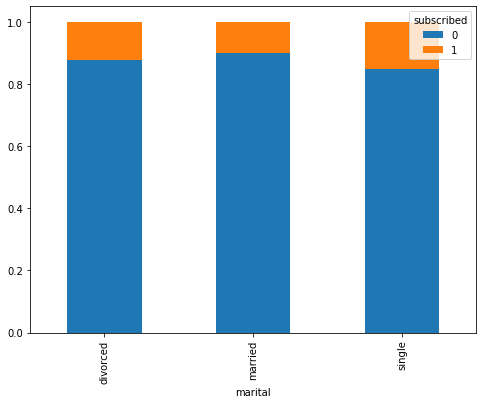

In [30]:
marital = pd.crosstab(train['marital'],train['subscribed'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm.plot.bar(stacked=True,figsize=(8,6));
# marital does not have max impact on target

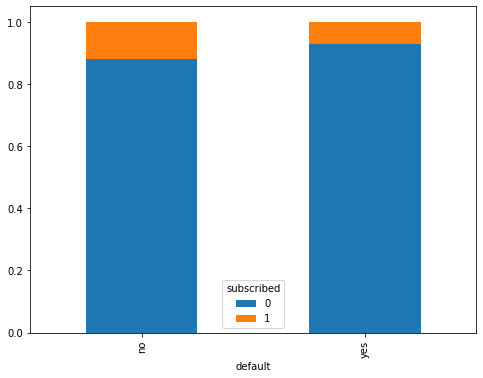

In [31]:
default = pd.crosstab(train['default'],train['subscribed'])
default_norm = default.div(default.sum(1).astype(float), axis=0)
default_norm.plot.bar(stacked=True,figsize=(8,6));
# people not having default history having chances to do term deposit

# Model Building

In [32]:
train=pd.get_dummies(train)
train.shape

(31647, 53)

In [33]:
target=train['subscribed']
train=train.drop('subscribed',axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_val,y_train,y_val=train_test_split(train,target,test_size=0.2,random_state=12)

In [36]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((25317, 52), (6330, 52), (25317,), (6330,))

# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [38]:
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
log_pred=log.predict(x_val)
log_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_val,log_pred)

0.891785150078989

# Decision tree

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5,random_state=0)

In [70]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [71]:
dt_pred=dt.predict(x_val)

In [72]:
accuracy_score(y_val,dt_pred)

0.9063191153238547

# Now we do prediction on test dataset

In [73]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [76]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [77]:
test=pd.get_dummies(test)

In [78]:
test.shape

(13564, 52)

In [79]:
test_pred=dt.predict(test)

In [80]:
result=pd.DataFrame()

In [81]:
result['ID']=test['ID']

In [82]:
result['subscribed']=test_pred

In [83]:
result.head()

,ID,subscribed
0,38441,0
1,40403,1
2,3709,0
3,37422,0
4,12527,0


In [88]:
result['subscribed']

0         no
1        yes
2         no
3         no
4         no
        ... 
13559     no
13560     no
13561     no
13562    yes
13563     no
Name: subscribed, Length: 13564, dtype: object

In [87]:
result['subscribed'].replace({0:'no',1:'yes'},inplace=True)

In [108]:
result.to_csv(r'C:\Users\1\Desktop\Internahala course (Data Science\Study Material\Module 1\Project\solution file.csv',index=False)

In [109]:
result.head()

,ID,subscribed
0,38441,no
1,40403,yes
2,3709,no
3,37422,no
4,12527,no


# RF model

In [97]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [99]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
rf_pred=rf.predict(x_val)

In [101]:
accuracy_score(y_val,rf_pred)

0.9080568720379147

In [102]:
rf_test=rf.predict(test)